This code comes after the exploration and preparation parts were data has been processed and splited in training and testing parts.

Here we will try different classification algorithms to identify which one is the better.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random


X_train = pd.read_pickle('C:/Users/laleu/OneDrive/Documents/2A/IA/Hotel_Cancelations_Predictions/data/X_train.pkl')
y_train = pd.read_pickle('C:/Users/laleu/OneDrive/Documents/2A/IA/Hotel_Cancelations_Predictions/data/y_train.pkl')
X_test = pd.read_pickle('C:/Users/laleu/OneDrive/Documents/2A/IA/Hotel_Cancelations_Predictions/data/X_test.pkl')
y_test = pd.read_pickle('C:/Users/laleu/OneDrive/Documents/2A/IA/Hotel_Cancelations_Predictions/data/y_test.pkl')

This modeling will be done just for our explored and prepared dataset. We decided this because it's simplier and it will provides us more time to explore with different algorithms and make our model better. Also the information of this dataset it's more reliable than the original one, so comparing the two models won't be crucial to decide if the previous analysis is properly done.

# **PERFORMANCE METRICS**

Our dataset it's very related to business and economic situations. This means that our goal will be to minimize the financial cost of our topic. In this point, we have to think what is worse, to predict someone won't cancell when they actually do or to predict someone will cancell when they don't, that are the two possible mistakes we can make.  It seems more logical to focus on finding as much cancellations we can get, even this means making mistakes with bookings that are not actually cancelled, this means to focus on our first mistake. So the wise solution might be focusing on recall rather than precision. Nevertheless, we don't really know the financial cost of the two situations, as maybe deciding one booking will be cancelled when it won't could be also as expensive as the reverse situation, but the truth is that as we can't really cancell the reservation even thought we think it will be, and probably we will just be able to send some email reminder or something like this, we will focus on recall.

Having around 37000 yearly reservations, we consider that a change in recall score under 100/37000 ≈ 0.003 is not significant (under 100 reservations per year).


# **APPLYING DIFFERENT MODELS**

We will apply the following algorithms: 

K neighbours

Logistic Regression

Decision Tree

Naive Bayes

Random Forest

Bagging (with decision tree)

Adaptative Boosting (with decision tree)

Gradient Boosting 

Multi-layer perceptron


## K neighbours

### Hyperparameter tunning

Importing useful functions and algorithms:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import GradientBoostingClassifier

### Finding p

Due to the large size of the dataset (approximately 77,000 rows), running a full grid search across the entire dataset proved too time-consuming. To address this, we limited the grid search—specifically the one used to determine the best value of p—to a subset of the data. Our goal was to keep the execution time within a reasonable range of 5 to 10 minutes. This constraint required us to significantly reduce the dataset size for the grid search phase. After experimenting with various subset proportions, we settled on using 10% of the data (approximately ~ 7 000 rows), assuming that it provides a good balance between computational efficiency and not too biased results.

In [20]:
for rand in range(0, 10):

  subset_size = 0.10
  X_subset, _, y_subset, _ = train_test_split(X_train, y_train, train_size=subset_size, stratify=y_train, random_state=42) # we fix the random state so that every run gives the same result

  knn = KNeighborsClassifier()

  param_grid = {
      'n_neighbors': [3, 5, 8, 12, 20],
      'weights': ['uniform', 'distance'],
      'p': [1, 2, 3, 4, 5]
  }

  grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='recall')

  grid_search.fit(X_subset, y_subset)

  best_params = grid_search.best_params_
  print("Best parameters found: ", best_params)

Best parameters found:  {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best parameters found:  {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best parameters found:  {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best parameters found:  {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best parameters found:  {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best parameters found:  {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best parameters found:  {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best parameters found:  {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best parameters found:  {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best parameters found:  {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


We keep p = 1.

### Finding n_neighbors

With only the neighbors to find with the Grid Search, the computational cost is not a big problem here. The Grid Search is applied on all the dataset.

We perform a search with fixed weights and p parameters to determine the best k value.

We start searching from 1 to 1001 (200 by 200)

Best k value found:  1


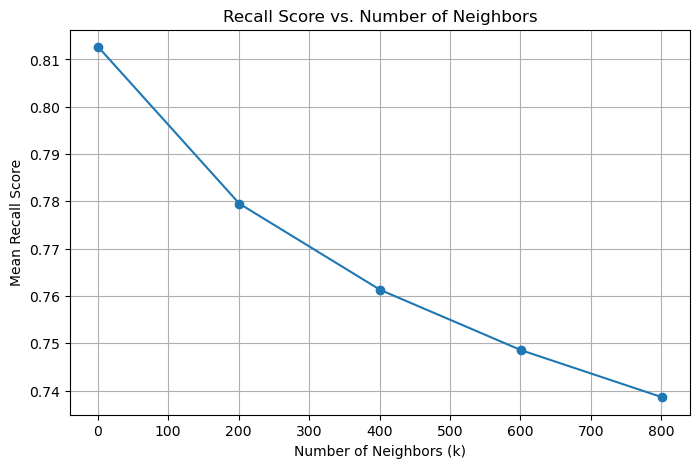

In [21]:
knn = KNeighborsClassifier()

param_grid = {
      'n_neighbors': [200 * i + 1 for i in range(0, 5)],
      'weights': ['distance'],
      'p': [1]
}

grid_search = GridSearchCV(knn, param_grid, scoring='recall')

grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print("Best k value found: ", best_params.get('n_neighbors'))

results = grid_search.cv_results_
k_values = param_grid['n_neighbors']
mean_recall = [results['mean_test_score'][i] for i in range(len(k_values))]

plt.figure(figsize=(8, 5))
plt.plot(k_values, mean_recall, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Recall Score')
plt.title('Recall Score vs. Number of Neighbors')
plt.grid(True)
plt.show()

Best value found: k=1

The recall score is clearly decreasing when increasing k.

Third search from 1 to 201 (40 by 40)

Best k value found:  1


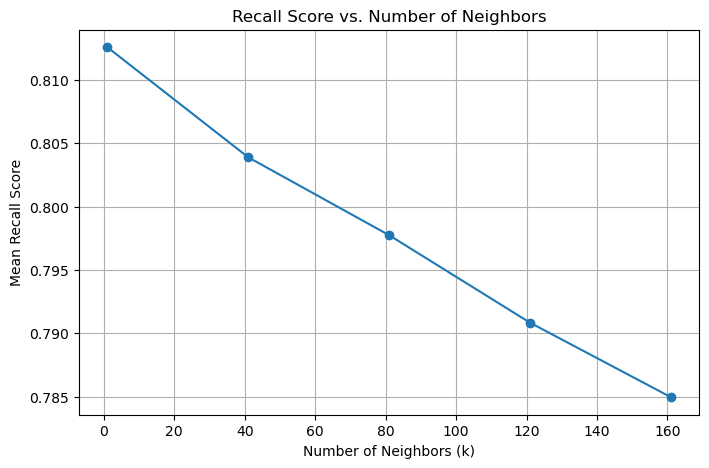

In [22]:
knn = KNeighborsClassifier()

param_grid = {
      'n_neighbors': [40 * i + 1 for i in range(0, 5)],
      'weights': ['distance'],
      'p': [1]
}

grid_search = GridSearchCV(knn, param_grid, scoring='recall')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best k value found: ", best_params.get('n_neighbors'))

results = grid_search.cv_results_
k_values = param_grid['n_neighbors']
mean_recall = [results['mean_test_score'][i] for i in range(len(k_values))]

plt.figure(figsize=(8, 5))
plt.plot(k_values, mean_recall, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Recall Score')
plt.title('Recall Score vs. Number of Neighbors')
plt.grid(True)
plt.show()

Best value found: k=1

The recall score is clearly decreasing when increasing k.

Fourth grid search from 1 to 41 (8 by 8)

Best k value found:  9


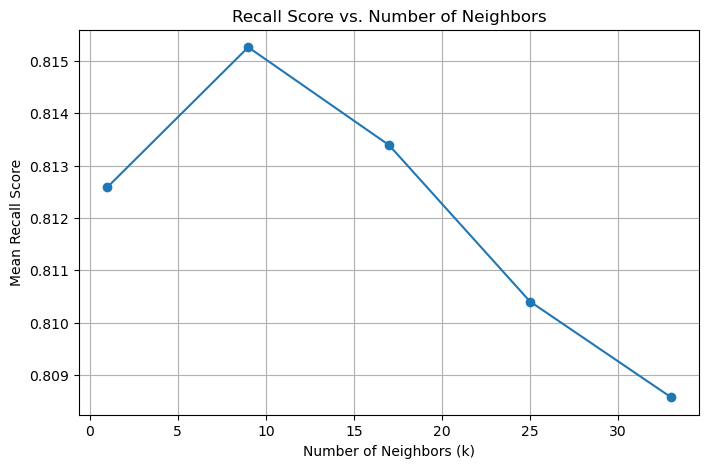

In [23]:
knn = KNeighborsClassifier()

param_grid = {
      'n_neighbors': [8 * i + 1 for i in range(0, 5)],
      'weights': ['distance'],
      'p': [1]
}

grid_search = GridSearchCV(knn, param_grid, scoring='recall')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best k value found: ", best_params.get('n_neighbors'))

results = grid_search.cv_results_
k_values = param_grid['n_neighbors']
mean_recall = [results['mean_test_score'][i] for i in range(len(k_values))]

plt.figure(figsize=(8, 5))
plt.plot(k_values, mean_recall, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Recall Score')
plt.title('Recall Score vs. Number of Neighbors')
plt.grid(True)
plt.show()

Best value found: k=9

On the graph 9 seems to be a maximum

Fifth search from 2 to 16 (2 by 2)

Best k value found:  8


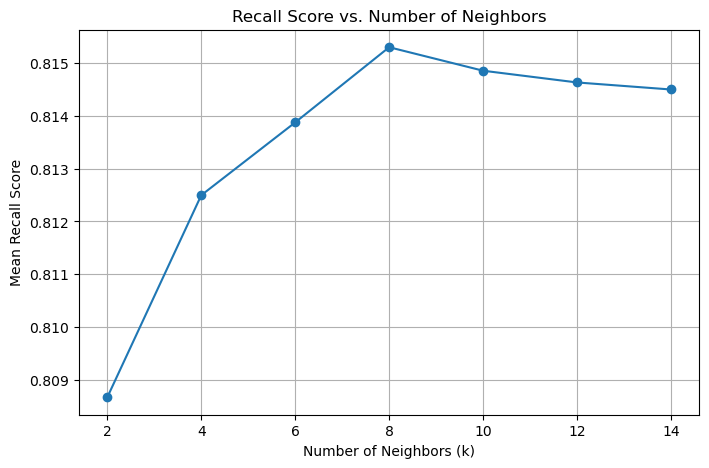

In [24]:
knn = KNeighborsClassifier()

param_grid = {
      'n_neighbors': [2*i for i in range(1, 8)],
      'weights': ['distance'],
      'p': [1]
}

grid_search = GridSearchCV(knn, param_grid, scoring='recall')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best k value found: ", best_params.get('n_neighbors'))

results = grid_search.cv_results_
k_values = param_grid['n_neighbors']
mean_recall = [results['mean_test_score'][i] for i in range(len(k_values))]

plt.figure(figsize=(8, 5))
plt.plot(k_values, mean_recall, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Recall Score')
plt.title('Recall Score vs. Number of Neighbors')
plt.grid(True)
plt.show()

Best value found: k=8

We will select the greatest value of k that has a recall difference of less them 0.003 with the highest recall value.

For that we first search for the maximum value.

Best k value found:  8


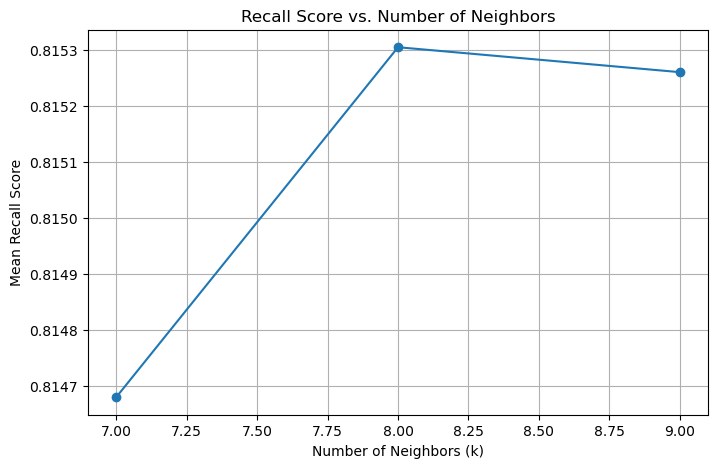

In [25]:
knn = KNeighborsClassifier()

param_grid = {
      'n_neighbors': [7, 8, 9],
      'weights': ['distance'],
      'p': [1]
}

grid_search = GridSearchCV(knn, param_grid, scoring='recall')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best k value found: ", best_params.get('n_neighbors'))

results = grid_search.cv_results_
k_values = param_grid['n_neighbors']
mean_recall = [results['mean_test_score'][i] for i in range(len(k_values))]

plt.figure(figsize=(8, 5))
plt.plot(k_values, mean_recall, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Recall Score')
plt.title('Recall Score vs. Number of Neighbors')
plt.grid(True)
plt.show()

The maximum value is k=8, with a recall of 0.81526
We search from 9 to 20 until wee find the highest k value with a recall value superior to 0.81526 - 0.003 = 0.81226

Best k value found:  9
Best k value found:  19


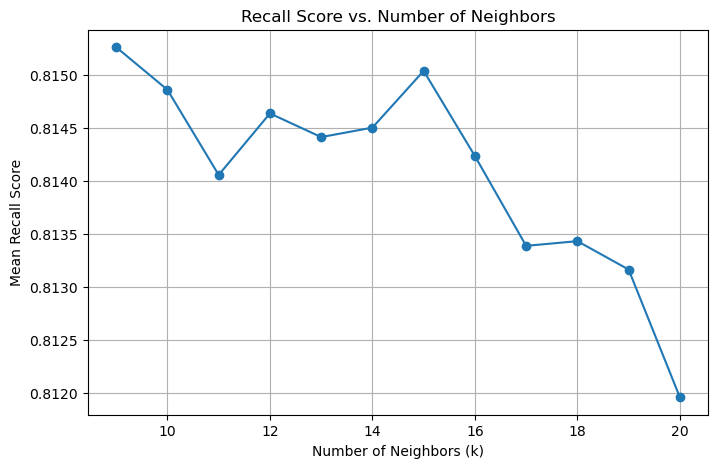

In [26]:
knn = KNeighborsClassifier()

param_grid = {
      'n_neighbors': [i for i in range(9, 21)],
      'weights': ['distance'],
      'p': [1]
}

grid_search = GridSearchCV(knn, param_grid, scoring='recall')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best k value found: ", best_params.get('n_neighbors'))

results = grid_search.cv_results_
k_values = param_grid['n_neighbors']
mean_recall = [results['mean_test_score'][i] for i in range(len(k_values))]

best_k = 8
for i in range(len(mean_recall)):
    if mean_recall[i] > 0.81226:
        best_k = k_values[i]
    else:
      break
print("Best k value found: ", best_k)

plt.figure(figsize=(8, 5))
plt.plot(k_values, mean_recall, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Recall Score')
plt.title('Recall Score vs. Number of Neighbors')
plt.grid(True)
plt.show()

k=19 is the greatest k with a recall value above 0.81226


The parameters that we will use for our model are :


*   n_neighbours = 19
*   weights = 'distance'
*   p = 1

We are aware that our results can be biased due to the subset of data used 


### Result

In [27]:
knn = KNeighborsClassifier(n_neighbors=19, weights='distance', p=1)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.8689119170984456
F1: 0.8397043294614572
Recall: 0.826955074875208


## Logistic regression

### Hyperparameter C tunning

We apply the same gridsearch methodology. Here the hyperparameter is C, that controls the trade-off between fitting the training data well and generalizing to new data. A smaller C encourages a simpler model while a larger C allows the model to fit the training data more closely.

Best C: 100
Recall: 0.6987312811980033


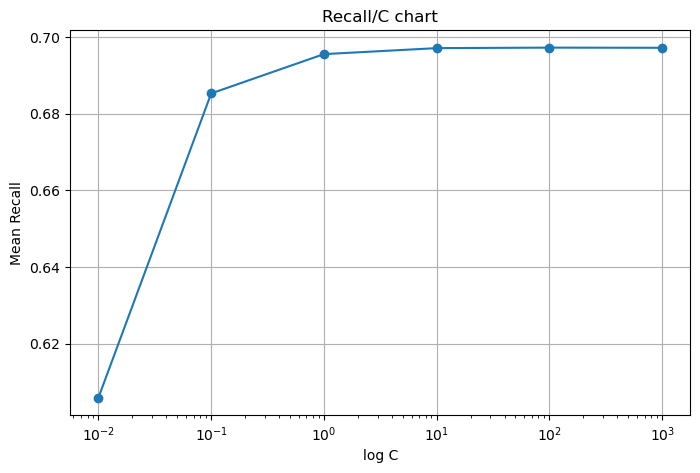

\ Mean recall for every C values' check validation:
C =   0.01 --> Mean recall = 0.6059
C =    0.1 --> Mean recall = 0.6853
C =      1 --> Mean recall = 0.6955
C =     10 --> Mean recall = 0.6971
C =    100 --> Mean recall = 0.6972
C =   1000 --> Mean recall = 0.6972


In [28]:
C_values = [0.01, 0.1, 1, 10, 100, 1000]
param_grid = {'C': C_values}

logreg = LogisticRegression(max_iter=5000)

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='recall', return_train_score=True)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Best C:", grid_search.best_params_['C'])
print("Recall:", recall_score(y_test, y_pred))

mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(8, 5))
plt.plot(C_values, mean_test_scores, marker='o')
plt.xscale('log')
plt.xlabel('log C')
plt.ylabel('Mean Recall')
plt.title('Recall/C chart')
plt.grid(True)
plt.show()

print("\ Mean recall for every C values' check validation:")
for C_val, score in zip(C_values, mean_test_scores):
    print(f"C = {C_val:>6} --> Mean recall = {score:.4f}")

According to our assumption that 0,003 difference in recall is not significant, the best hyperparameters is between 0,1 and 1.

Taking 0.697 as the better recall, we will search for the first value of C that reach 0,694.

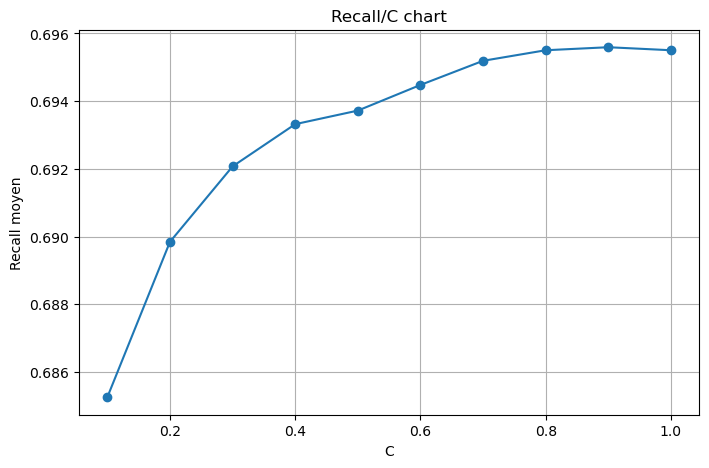

\ Mean recall for every C values' check validation:
C =    0.1 --> Mean recall = 0.6853
C =    0.2 --> Mean recall = 0.6898
C = 0.30000000000000004 --> Mean recall = 0.6921
C =    0.4 --> Mean recall = 0.6933
C =    0.5 --> Mean recall = 0.6937
C =    0.6 --> Mean recall = 0.6945
C = 0.7000000000000001 --> Mean recall = 0.6952
C =    0.8 --> Mean recall = 0.6955
C =    0.9 --> Mean recall = 0.6956
C =    1.0 --> Mean recall = 0.6955

Best C = 0.6


In [29]:
C_values = np.linspace(0.1, 1, 10)
param_grid = {'C': C_values}

logreg = LogisticRegression(max_iter=5000)

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='recall', return_train_score=True)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(8, 5))
plt.plot(C_values, mean_test_scores, marker='o')
plt.xlabel('C')
plt.ylabel('Recall moyen')
plt.title('Recall/C chart')
plt.grid(True)
plt.show()

print("\ Mean recall for every C values' check validation:")
for C_val, score in zip(C_values, mean_test_scores):
    print(f"C = {C_val:>6} --> Mean recall = {score:.4f}")

threshold = 0.694
best_C = None
for C_val, score in zip(C_values, mean_test_scores):
    if score > threshold:
        best_C = C_val
        break

if best_C is not None:
    print(f"\nBest C = {best_C}")

Best C = 0,6.

### Results

In [30]:
logreg_final = LogisticRegression(C=best_C, max_iter=5000)
logreg_final.fit(X_train, y_train)


y_pred = logreg_final.predict(X_test)

print(f"\nLogistic Regression with C = {best_C}")
print("Recall:", recall_score(y_test, y_pred))


Logistic Regression with C = 0.6
Recall: 0.6975873544093179


Logistic Regression with C = 0.6

Recall: 0.6975873544093179

## Decision tree

### Hyperparameter tunning

We graph four variables (our three hyperparameters and the recall score) in 2D using the color and the size of the points.

The points are Red for gini criterion and Blue for etropy criterion.
The size of the points represents the minimum sample splits.

Let's have a first approximation of the tree's depth.

In [31]:
default_dt = DecisionTreeClassifier()

default_dt.fit(X_train, y_train)

print("Depth of the tree:", default_dt.get_depth())

Depth of the tree: 41


That means, we will not go a lot further 42 when tunning the depth.

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best hyperparameters: {'criterion': 'gini', 'max_depth': 35, 'min_samples_split': 2, 'random_state': 42}


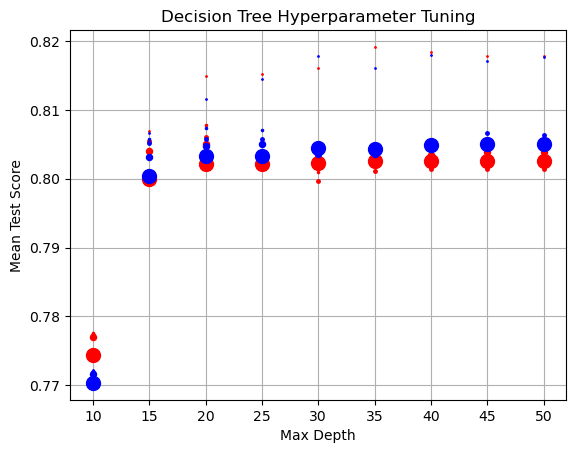

In [32]:
dt = DecisionTreeClassifier()


param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 15, 20, 25, 30, 35, 40, 45, 50],
    'min_samples_split': [2, 5, 10, 20, 50],
    'random_state': [42]
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, scoring='recall', verbose=1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")




max_depths = [param['max_depth'] for param in grid_search.cv_results_['params']]
mean_test_scores = grid_search.cv_results_['mean_test_score']

min_samples_splits = [param['min_samples_split'] for param in grid_search.cv_results_['params']]
# Normalize min_samples_split values for marker size (optional: scale them to a specific range)
normalized_sizes = np.interp(min_samples_splits, (min(min_samples_splits), max(min_samples_splits)), (1, 10))

plt.figure()

for i, param in enumerate(grid_search.cv_results_['params']):

    if param['criterion'] == 'gini':
        color = 'r'
    elif param['criterion'] == 'entropy':
        color = 'b'

    plt.plot(param['max_depth'], mean_test_scores[i], 'o', color=color, markersize=normalized_sizes[i])

plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.title('Decision Tree Hyperparameter Tuning')
plt.grid(True)
plt.show()


**max depth:**
We observe that the Max depth cannot be too low (10 is too low)


**min sample splits:**
A min_sample_split of 2 is largely superior.
However, to avoid overfitting, since once over 2, seem not to have a significant impact, we are going to ignore values under 5 and search for the biggest min_sample_splits value that does not have a significant negative impact on the results.

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 5, 'random_state': 42}


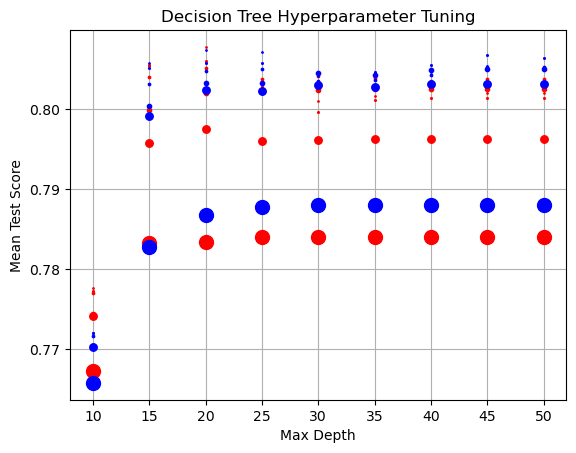

In [33]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 15, 20, 25, 30, 35, 40, 45, 50],
    'min_samples_split': [5, 10, 20, 50, 100, 200],
    'random_state': [42]
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, scoring='recall', verbose=1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")


mean_test_scores = grid_search.cv_results_['mean_test_score']

min_samples_splits = [param['min_samples_split'] for param in grid_search.cv_results_['params']]
# Normalize min_samples_split values for marker size (optional: scale them to a specific range)
normalized_sizes = np.interp(min_samples_splits, (min(min_samples_splits), max(min_samples_splits)), (1, 10))

plt.figure()

for i, param in enumerate(grid_search.cv_results_['params']):

    if param['criterion'] == 'gini':
        color = 'r'
    elif param['criterion'] == 'entropy':
        color = 'b'

    plt.plot(param['max_depth'], mean_test_scores[i], 'o', color=color, markersize=normalized_sizes[i])


plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.title('Decision Tree Hyperparameter Tuning')
plt.grid(True)
plt.show()

**max depth:**
There is a clear change between 10 and 20 and then it becomes quite stable. Between 20 and 30 the benefit of having a low min sample split disapears (overfitting benefit??).


**min sample splits:**
min_sample_splits of 200 or more is to exclude.

**criterion:**
The entropy criterion is almost always more efficient.

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best hyperparameters: {'criterion': 'entropy', 'max_depth': 24, 'min_samples_split': 10, 'random_state': 42}


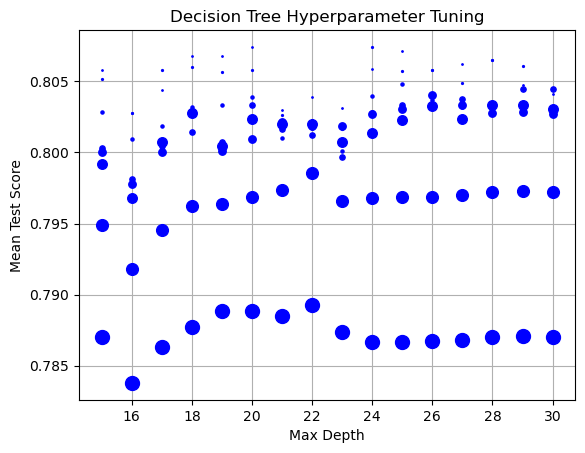

In [34]:
param_grid = {
    'criterion': ['entropy'],
    'max_depth': [i for i in range(15, 31)],
    'min_samples_split': [5, 10, 25, 50, 75, 100, 125, 150],
    'random_state': [42]
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, scoring='recall', verbose=1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")


mean_test_scores = grid_search.cv_results_['mean_test_score']

min_samples_splits = [param['min_samples_split'] for param in grid_search.cv_results_['params']]
# Normalize min_samples_split values for marker size (optional: scale them to a specific range)
normalized_sizes = np.interp(min_samples_splits, (min(min_samples_splits), max(min_samples_splits)), (1, 10))

plt.figure()

for i, param in enumerate(grid_search.cv_results_['params']):

    if param['criterion'] == 'gini':
        color = 'r'
    elif param['criterion'] == 'entropy':
        color = 'b'

    plt.plot(param['max_depth'], mean_test_scores[i], 'o', color=color, markersize=normalized_sizes[i])


plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.title('Decision Tree Hyperparameter Tuning')
plt.grid(True)
plt.show()

**max depth:**
After 18 the test score loses any upwards trend. The score stays flat after 26.


**min sample splits:**
min_sample_splits of 125 or more are to exclude.

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best hyperparameters: {'criterion': 'entropy', 'max_depth': 26, 'min_samples_split': 40, 'random_state': 42}


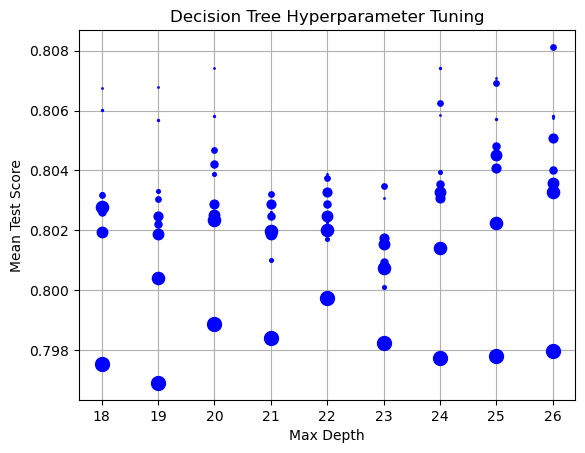

In [35]:
param_grid = {
    'criterion': ['entropy'],
    'max_depth': [i for i in range(18, 27)],
    'min_samples_split': [5, 10, 25, 40, 55, 70, 85, 100, 115],
    'random_state': [42]
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, scoring='recall', verbose=1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")


mean_test_scores = grid_search.cv_results_['mean_test_score']

min_samples_splits = [param['min_samples_split'] for param in grid_search.cv_results_['params']]
# Normalize min_samples_split values for marker size (optional: scale them to a specific range)
normalized_sizes = np.interp(min_samples_splits, (min(min_samples_splits), max(min_samples_splits)), (1, 10))

plt.figure()

for i, param in enumerate(grid_search.cv_results_['params']):

    if param['criterion'] == 'gini':
        color = 'r'
    elif param['criterion'] == 'entropy':
        color = 'b'

    plt.plot(param['max_depth'], mean_test_scores[i], 'o', color=color, markersize=normalized_sizes[i])


plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.title('Decision Tree Hyperparameter Tuning')
plt.grid(True)
plt.show()

**max depth:**
Max depth of 21 to 23 give lower scores.


**min sample splits:**
min_sample_splits of 115 or more are to exclude.

From now on we will represent the max depth as the size of the point (and min sample splits as the x axis) to facilitate visualisation.

Fitting 5 folds for each of 66 candidates, totalling 330 fits
Best hyperparameters: {'criterion': 'entropy', 'max_depth': 25, 'min_samples_split': 65, 'random_state': 42}


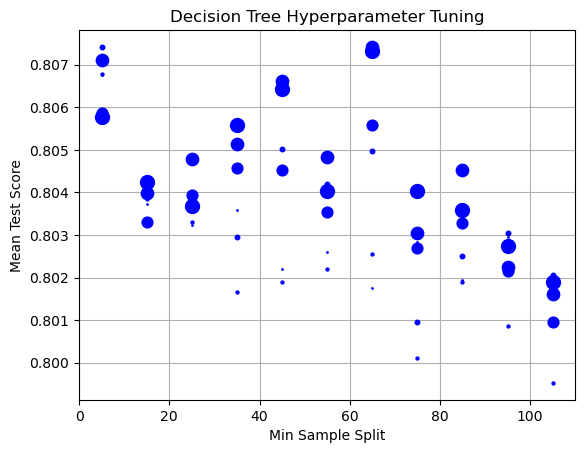

In [36]:
param_grid = {
    'criterion': ['entropy'],
    'max_depth': [18, 19, 20, 24, 25, 26],
    'min_samples_split': [5+10*i for i in range(0, 11)],
    'random_state': [42]
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, scoring='recall', verbose=1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")



mean_test_scores = grid_search.cv_results_['mean_test_score']

max_depth = [param['max_depth'] for param in grid_search.cv_results_['params']]
# Normalize min_samples_split values for marker size (optional: scale them to a specific range)
normalized_sizes = np.interp(max_depth, (min(max_depth), max(max_depth)), (1, 10))

plt.figure()

for i, param in enumerate(grid_search.cv_results_['params']):

    if param['criterion'] == 'gini':
        color = 'r'
    elif param['criterion'] == 'entropy':
        color = 'b'

    plt.plot(param['min_samples_split'], mean_test_scores[i], 'o', color=color, markersize=normalized_sizes[i])


plt.xlabel('Min Sample Split')
plt.ylabel('Mean Test Score')
plt.title('Decision Tree Hyperparameter Tuning')
plt.grid(True)
plt.show()

**max depth:**
Max depth of 18 and 19 give low scores


**min sample splits:**
min_sample_splits of 5 creates a suspiciously high score, even with lower tree depth, we delete it to avoid overfiting. Ignoring this, the trend seems to indicate a maximum around 65.

Fitting 5 folds for each of 84 candidates, totalling 420 fits
Best hyperparameters: {'criterion': 'entropy', 'max_depth': 26, 'min_samples_split': 64, 'random_state': 42}


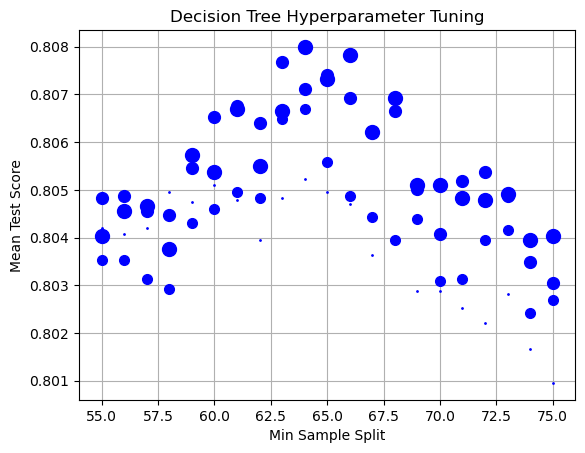

In [37]:
param_grid = {
    'criterion': ['entropy'],
    'max_depth': [20, 24, 25, 26],
    'min_samples_split': [55+i for i in range(0, 21)],
    'random_state': [42]
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, scoring='recall', verbose=1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")



mean_test_scores = grid_search.cv_results_['mean_test_score']

max_depth = [param['max_depth'] for param in grid_search.cv_results_['params']]
# Normalize min_samples_split values for marker size (optional: scale them to a specific range)
normalized_sizes = np.interp(max_depth, (min(max_depth), max(max_depth)), (1, 10))

plt.figure()

for i, param in enumerate(grid_search.cv_results_['params']):

    if param['criterion'] == 'gini':
        color = 'r'
    elif param['criterion'] == 'entropy':
        color = 'b'

    plt.plot(param['min_samples_split'], mean_test_scores[i], 'o', color=color, markersize=normalized_sizes[i])


plt.xlabel('Min Sample Split')
plt.ylabel('Mean Test Score')
plt.title('Decision Tree Hyperparameter Tuning')
plt.grid(True)
plt.show()

We find a maximum at **min sample splits**=64 and **max depth**=26.

### Results

We apply decision tree on X_train, y_train, X_test, y_test and compute confusion matrix as well as the classification report.

In [38]:
best_dt = DecisionTreeClassifier(criterion='gini', max_depth=26, min_samples_split=64, random_state=42)

best_dt.fit(X_train, y_train)

y_pred = best_dt.predict(X_test)

print("Recall:", recall_score(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Not Cancelled', 'Cancelled'], columns=['Not Cancelled', 'Cancelled'])
print("Confusion Matrix:\n", conf_matrix_df)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)

Recall: 0.7992928452579035
Confusion Matrix:
                Not Cancelled  Cancelled
Not Cancelled          12136       1408
Cancelled               1930       7686

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88     13544
           1       0.85      0.80      0.82      9616

    accuracy                           0.86     23160
   macro avg       0.85      0.85      0.85     23160
weighted avg       0.86      0.86      0.86     23160



## Naive Bayes

Applying the Naive Bayes algorithm doesn't require any hyperparameter tunning. Assuming that our features are independant we can make the predictions:

In [39]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print("Gaussian Naive Bayes's results:")

print("Recall:", recall_score(y_test, y_pred))

Gaussian Naive Bayes's results:
Recall: 0.8579450915141431


## Support Vector Machines

In this algorithm, we must chose the best Kernel function first.

To find it, we consider C value set by default. This value will be optimized later.

### Finding the best Kernel function

The following script takes around 20 minutes to run.

In [40]:
kernels = ['linear', 'poly', 'sigmoid', 'rbf']
recall_scores = []

for kernel in kernels:
    print(f"Testing: {kernel}")

    # Default Gamma and C parameters:
    if kernel in ['rbf', 'poly', 'sigmoid']:
        svm = SVC(kernel=kernel, C=1, gamma='scale')
    else:
        svm = SVC(kernel=kernel, C=1)

    recall_cv = cross_val_score(svm, X_train, y_train, cv=5, scoring='recall').mean()
    recall_scores.append(recall_cv)
    print(f"Mean recall (cv): {recall_cv:.4f}\n")

Testing: linear
Mean recall (cv): 0.7054

Testing: poly
Mean recall (cv): 0.7753

Testing: sigmoid
Mean recall (cv): 0.5593

Testing: rbf
Mean recall (cv): 0.7743



Linear ->
Mean Recall (cv): 0.7054

Poly ->
Mean Recall (cv): 0.7753

Sigmoid ->
Mean Recall (cv): 0.5593

rbf ->
Mean Recall (cv): 0.7743

We chose the polynomial Kernel function.

### Tunning C

The gridsearch takes too much time when using it with all the data. As we did in the begining, we will use only 10% of the data to identify the best C. That represents arounnd 10 min of run.

Best C: 100
Best recall (cv): 0.7892


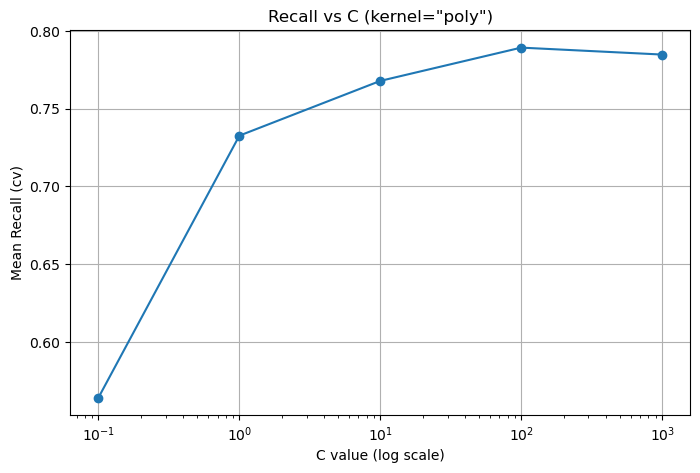

In [41]:
from sklearn.svm import SVC

best_kernel = 'poly'
C_values = [0.1, 1, 10, 100, 1000]
subset_size = 0.10

X_subset, _, y_subset, _ = train_test_split(
    X_train, y_train,
    train_size=subset_size,
    stratify=y_train,
    random_state=42
)

svm = SVC(kernel=best_kernel, gamma='scale')
param_grid = {'C': C_values}

grid_search = GridSearchCV(
    svm,
    param_grid,
    cv=5,
    scoring='recall',
    return_train_score=False
)
grid_search.fit(X_subset, y_subset)

results = grid_search.cv_results_
mean_recalls = results['mean_test_score']

print(f"Best C: {grid_search.best_params_['C']}")
print(f"Best recall (cv): {grid_search.best_score_:.4f}")


plt.figure(figsize=(8, 5))
plt.plot(C_values, mean_recalls, marker='o')
plt.xscale('log')
plt.xlabel('C value (log scale)')
plt.ylabel('Mean Recall (cv)')
plt.title(f'Recall vs C (kernel="{best_kernel}")')
plt.grid(True)
plt.show()


The best C is between 10 and 100. We will look for the first C that gives a recall bigger than 0.7892 - 0.003 = 0.7889.

Best C: 100.0
Best recall (cv): 0.7892
First C with recall > 0.7778: 100.0


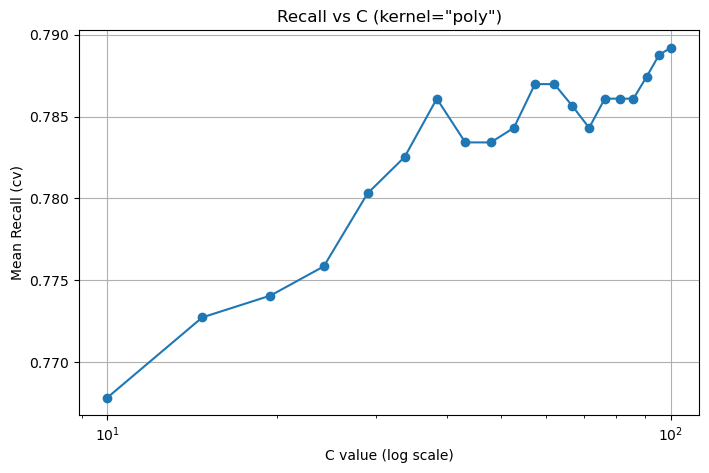

In [42]:
best_kernel = 'poly'
C_values = np.linspace(10, 100, 20)
subset_size = 0.10

X_subset, _, y_subset, _ = train_test_split(
    X_train, y_train,
    train_size=subset_size,
    stratify=y_train,
    random_state=42
)

svm = SVC(kernel=best_kernel, gamma='scale')
param_grid = {'C': C_values}

grid_search = GridSearchCV(
    svm,
    param_grid,
    cv=5,
    scoring='recall',
    return_train_score=False
)
grid_search.fit(X_subset, y_subset)

results = grid_search.cv_results_
mean_recalls = results['mean_test_score']

print(f"Best C: {grid_search.best_params_['C']}")
print(f"Best recall (cv): {grid_search.best_score_:.4f}")

for C, recall in zip(C_values, mean_recalls):
    if recall > 0.7889:
        print(f"First C with recall > 0.7778: {C}")
        break

plt.figure(figsize=(8, 5))
plt.plot(C_values, mean_recalls, marker='o')
plt.xscale('log')
plt.xlabel('C value (log scale)')
plt.ylabel('Mean Recall (cv)')
plt.title(f'Recall vs C (kernel="{best_kernel}")')
plt.grid(True)
plt.show()

We keep C = 100 as the best C, even though we know that this result might be biased due to cutting the dataset to reduce the computational cost. This relative big value of C means that a very few support vectors are accepted to be in the margin or misclassified. 

### Results

We apply the model on all the data. The code can take very much time to end.

In [43]:
svm = SVC(kernel='poly', C=100, gamma='scale')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Recall:", recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Recall: 0.7934692179700499
              precision    recall  f1-score   support

           0       0.86      0.91      0.88     13544
           1       0.86      0.79      0.82      9616

    accuracy                           0.86     23160
   macro avg       0.86      0.85      0.85     23160
weighted avg       0.86      0.86      0.86     23160



Recall: 0.7934692179700499

                 precision    recall  f1-score   support

        0           0.86      0.91      0.88     13544
        1           0.86      0.79      0.82      9616

        accuracy                       0.86     23160
        macro avg  0.86      0.85      0.85     23160
        weighted avg 0.86    0.86      0.86     23160

## Random Forest

### Tunning Hyperparameters

Hyperparameters considered are:

-The number of trees.

-The number of features to consider when looking for the best split.

-Size of the bootstrap sample.

-Hyperparameters of the individual decision trees.

The following code takes around 10 minutes to run.

In [44]:
subset_size = 0.1
X_subset, _, y_subset, _ = train_test_split(
    X_train, y_train,
    train_size=subset_size,
    stratify=y_train,
    random_state=42  
)

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],                  
    'max_features': ['sqrt', 'log2', None],          
    'max_depth': [None, 5, 10],                      
    'min_samples_split': [2, 5],                    
    'min_samples_leaf': [1, 2]                      
}

grid_search = GridSearchCV(
    rf,
    param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

print("Best Random Forest hyperparameters:")
print(grid_search.best_params_)
print(f"Best recall (cv): {grid_search.best_score_:.4f}")

Best Random Forest hyperparameters:
{'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best recall (cv): 0.8318


Best Random Forest hyperparameters:
{'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best recall (cv): 0.8318

Let's take a closer look to n_estimators, with the other hyperparameters fixed:

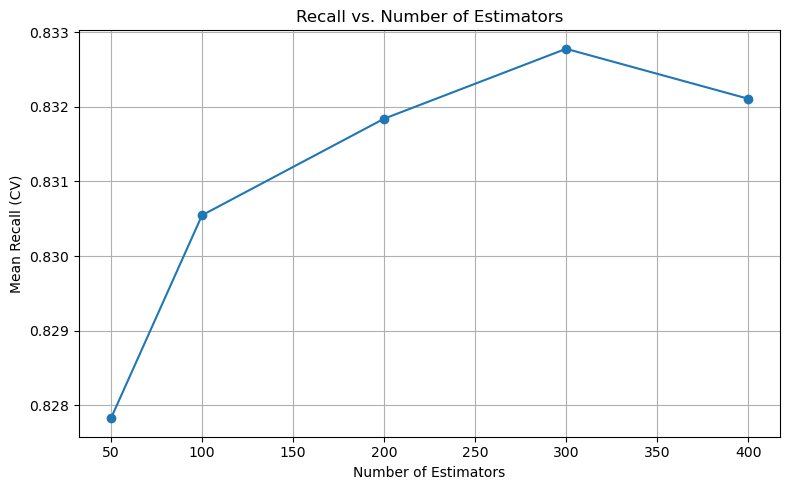

In [45]:
rf = RandomForestClassifier(
    random_state=42,
    max_depth=None,
    max_features=None,
    min_samples_leaf=1,
    min_samples_split=2
)

param_grid = {
    'n_estimators': [50, 100, 200, 300, 400]                                    
}

grid_search = GridSearchCV(
    rf,
    param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

n_estimators = param_grid['n_estimators']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(8, 5))
plt.plot(n_estimators, mean_test_scores, marker='o')
plt.title('Recall vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Recall (CV)')
plt.grid(True)
plt.tight_layout()
plt.show()

We can notice diferrences of around 0,002 between 100 and 300. Which is not really relevant. We decide to keep the lower estimator: 100 (difference between 50 and 300 is 0,005 which begins to be relevant).

### Results

In [46]:
best_rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2)
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

print("Recall:", recall_score(y_test, y_pred))

Recall: 0.8428660565723793


Recall: 0.8428660565723793

In comparison of the decision tree, results have been improved around 0,05 which is relevant. Reducing the variance with this random forest was a good option.

## Bagging with Decision Tree

We will try to improve our Decision Tree model with Bagging. First, we need to find the best bootstram sample for Bagging.

### Finding best bootstrap samples

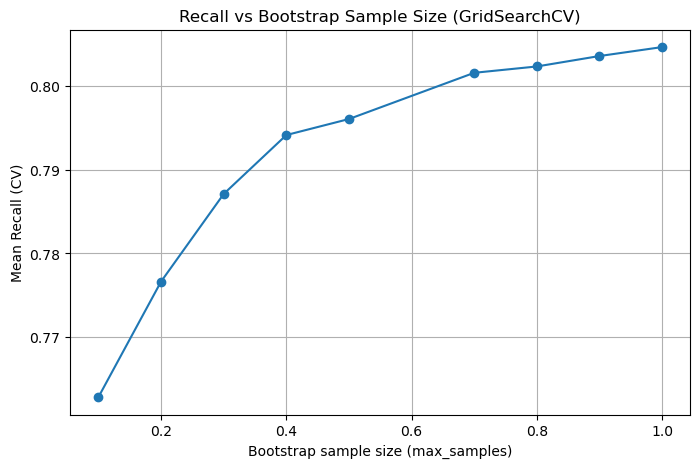

Best recall (CV): 0.8047
Best max_samples: 1.0


In [47]:
bagging = BaggingClassifier(
    estimator=best_dt,
    n_estimators=10,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

param_grid = {
    'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.8, 0.9, 1.0]
}

grid_search = GridSearchCV(
    bagging,
    param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    return_train_score=True
)

grid_search.fit(X_train, y_train)

bootstrap_samples = param_grid['max_samples']
mean_test_scores = grid_search.cv_results_['mean_test_score']

best_bagging = grid_search.best_estimator_
best_sample_size = grid_search.best_params_['max_samples']
best_recall = grid_search.best_score_

plt.figure(figsize=(8, 5))
plt.plot(bootstrap_samples, mean_test_scores, marker='o')
plt.xlabel('Bootstrap sample size (max_samples)')
plt.ylabel('Mean Recall (CV)')
plt.title('Recall vs Bootstrap Sample Size (GridSearchCV)')
plt.grid(True)
plt.show()

print(f"Best recall (CV): {best_recall:.4f}")
print(f"Best max_samples: {best_sample_size}")

The best sample size is 1, whoch must corresponds to the random forest more or less. This lacks of improvement shows stability.

### Results

In [48]:
bagging = BaggingClassifier(
        estimator=best_dt,
        n_estimators=10,
        max_samples=1.0,
        bootstrap=True,
        random_state=42,
        n_jobs=-1
    )

bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)
print("Recall:", recall_score(y_test, y_pred))

Recall: 0.8092762063227953


Recall: 0.8092762063227953
The recall is slightly improved.

## Adaptative Boosting with Decision Tree

### Tunning Hyperparameters

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters : {'learning_rate': 0.1, 'n_estimators': 200, 'random_state': 42}


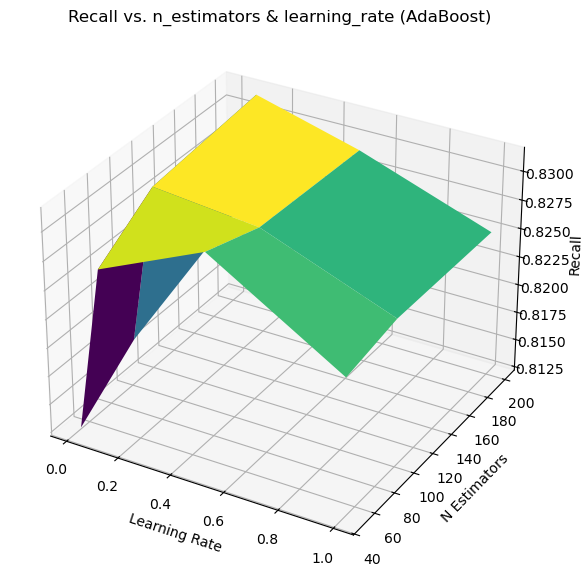

In [49]:
adaboost = AdaBoostClassifier(estimator=best_dt)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'random_state': [42] 
}

grid_search = GridSearchCV(
    estimator=adaboost,
    param_grid=param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters :", grid_search.best_params_)

results = grid_search.cv_results_
learning_rates = np.array(results['param_learning_rate'].data, dtype=float)
n_estimators = np.array(results['param_n_estimators'].data, dtype=int)
recalls = results['mean_test_score']

lr_unique = sorted(set(learning_rates))
ne_unique = sorted(set(n_estimators))
lr_grid, ne_grid = np.meshgrid(lr_unique, ne_unique)

recall_grid = np.zeros_like(lr_grid, dtype=float)
for i in range(len(recalls)):
    lr_idx = lr_unique.index(learning_rates[i])
    ne_idx = ne_unique.index(n_estimators[i])
    recall_grid[ne_idx, lr_idx] = recalls[i]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(lr_grid, ne_grid, recall_grid, cmap='viridis')

ax.set_xlabel('Learning Rate')
ax.set_ylabel('N Estimators')
ax.set_zlabel('Recall')
ax.set_title('Recall vs. n_estimators & learning_rate (AdaBoost)')

plt.show()

Lets fix the learning rate to 0,1 and take a closer look to n_estimators:

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Hyperparameters: {'n_estimators': 250, 'random_state': 42}


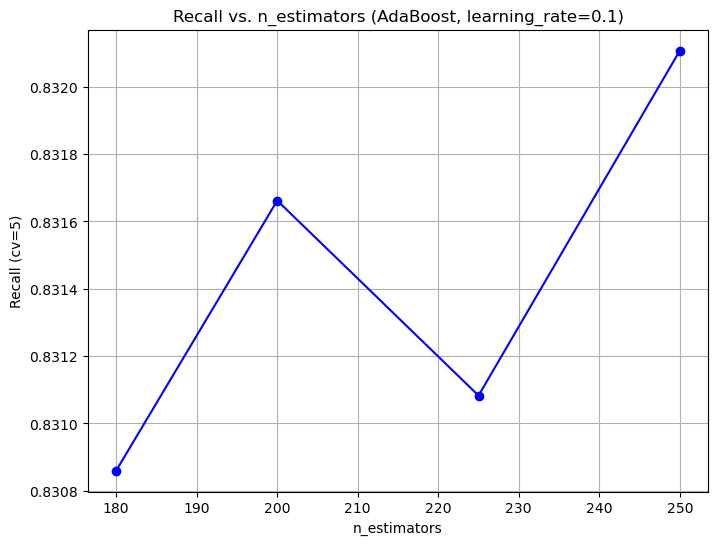

In [50]:
adaboost = AdaBoostClassifier(estimator=best_dt, learning_rate=0.1)

param_grid = {
    'n_estimators': [180, 200, 225, 250],
    'random_state': [42]
}

grid_search = GridSearchCV(
    estimator=adaboost,
    param_grid=param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

results = grid_search.cv_results_
n_estimators = np.array(results['param_n_estimators'].data, dtype=int)
recalls = results['mean_test_score']

plt.figure(figsize=(8, 6))
plt.plot(n_estimators, recalls, marker='o', linestyle='-', color='blue')
plt.xlabel('n_estimators')
plt.ylabel('Recall (cv=5)')
plt.title('Recall vs. n_estimators (AdaBoost, learning_rate=0.1)')
plt.grid(True)
plt.show()


The difference between the lower and the higher recall is around 0,002, which is not really relevant. Lets take the lowest value of estimators in order to not prone overfitting.

### Results

In [51]:
adaboost = AdaBoostClassifier(estimator=best_dt, learning_rate=0.1, n_estimators = 180, random_state=42)
adaboost.fit(X_train, y_train)

y_pred = adaboost.predict(X_test)

recall = recall_score(y_test, y_pred)

print(f"Recall: {recall:.4f}")

Recall: 0.8388


Recall: 0.8388

## Gradient Boosting

### Tunning hyperparameters

Instead of using adaptative boosting with different weighs, we will use gradient boosting.

In order to speed up the search time we are going to define 3 pairs of max_depth / min_samples_split that we will use to find out the best learning rate and number of estimators.

max_depth / min_samples_split

3 / 2

5 / 5

7 / 10

Let's begin with 3/2

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters : {'learning_rate': 0.5, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 500, 'random_state': 42}


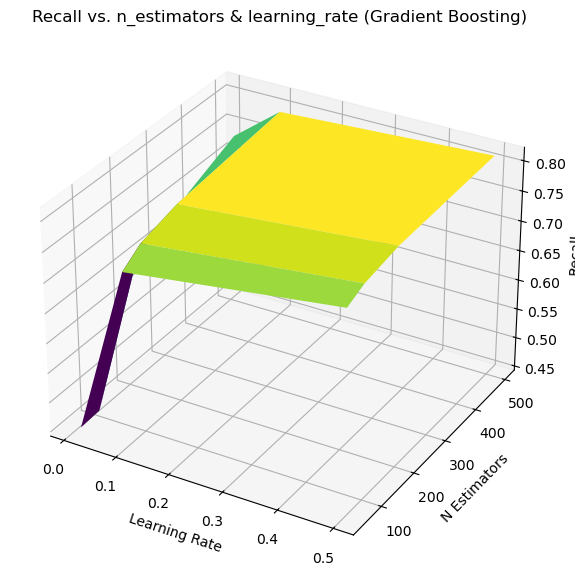

In [52]:
gb = GradientBoostingClassifier()

param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3],
    'min_samples_split': [2],
    'random_state': [42]
}

grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters :", grid_search.best_params_)

results = grid_search.cv_results_
learning_rates = np.array(results['param_learning_rate'].data, dtype=float)
n_estimators = np.array(results['param_n_estimators'].data, dtype=int)
recalls = results['mean_test_score']

lr_unique = sorted(set(learning_rates))
ne_unique = sorted(set(n_estimators))
lr_grid, ne_grid = np.meshgrid(lr_unique, ne_unique)

recall_grid = np.zeros_like(lr_grid, dtype=float)
for i in range(len(recalls)):
    lr_idx = lr_unique.index(learning_rates[i])
    ne_idx = ne_unique.index(n_estimators[i])
    recall_grid[ne_idx, lr_idx] = recalls[i]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(lr_grid, ne_grid, recall_grid, cmap='viridis')

ax.set_xlabel('Learning Rate')
ax.set_ylabel('N Estimators')
ax.set_zlabel('Recall')
ax.set_title('Recall vs. n_estimators & learning_rate (Gradient Boosting)')

plt.show()

We can observe that for the first pair, a high learning rate with a high number of estimators works better.

We search again with higher learning rates and number of estimators.

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters : {'learning_rate': 0.75, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 750, 'random_state': 42}


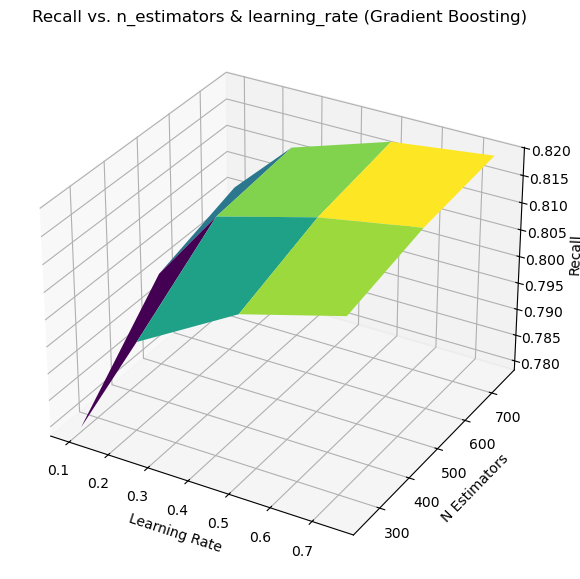

In [53]:
gb = GradientBoostingClassifier()

param_grid = {
    'n_estimators': [250, 500, 750],
    'learning_rate': [0.1, 0.25, 0.5, 0.75],
    'max_depth': [3],
    'min_samples_split': [2],
    'random_state': [42]
}

grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters :", grid_search.best_params_)

results = grid_search.cv_results_
learning_rates = np.array(results['param_learning_rate'].data, dtype=float)
n_estimators = np.array(results['param_n_estimators'].data, dtype=int)
recalls = results['mean_test_score']

lr_unique = sorted(set(learning_rates))
ne_unique = sorted(set(n_estimators))
lr_grid, ne_grid = np.meshgrid(lr_unique, ne_unique)

recall_grid = np.zeros_like(lr_grid, dtype=float)
for i in range(len(recalls)):
    lr_idx = lr_unique.index(learning_rates[i])
    ne_idx = ne_unique.index(n_estimators[i])
    recall_grid[ne_idx, lr_idx] = recalls[i]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(lr_grid, ne_grid, recall_grid, cmap='viridis')

ax.set_xlabel('Learning Rate')
ax.set_ylabel('N Estimators')
ax.set_zlabel('Recall')
ax.set_title('Recall vs. n_estimators & learning_rate (Gradient Boosting)')

plt.show()

As we can clearly see, higher learning rates and number of estimators once again give a better result.

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Hyperparameters : {'learning_rate': 0.75, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 1500, 'random_state': 42}


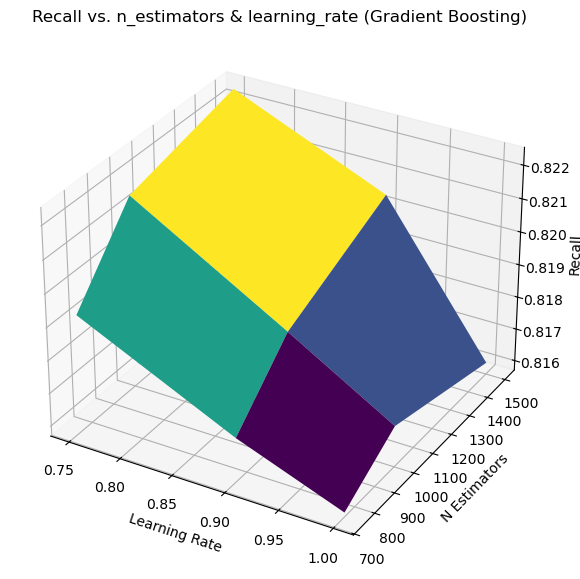

In [54]:
gb = GradientBoostingClassifier()

param_grid = {
    'n_estimators': [750, 1000, 1500],
    'learning_rate': [0.75, 0.9, 1],
    'max_depth': [3],
    'min_samples_split': [2],
    'random_state': [42]
}

grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters :", grid_search.best_params_)

results = grid_search.cv_results_
learning_rates = np.array(results['param_learning_rate'].data, dtype=float)
n_estimators = np.array(results['param_n_estimators'].data, dtype=int)
recalls = results['mean_test_score']

lr_unique = sorted(set(learning_rates))
ne_unique = sorted(set(n_estimators))
lr_grid, ne_grid = np.meshgrid(lr_unique, ne_unique)

recall_grid = np.zeros_like(lr_grid, dtype=float)
for i in range(len(recalls)):
    lr_idx = lr_unique.index(learning_rates[i])
    ne_idx = ne_unique.index(n_estimators[i])
    recall_grid[ne_idx, lr_idx] = recalls[i]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(lr_grid, ne_grid, recall_grid, cmap='viridis')

ax.set_xlabel('Learning Rate')
ax.set_ylabel('N Estimators')
ax.set_zlabel('Recall')
ax.set_title('Recall vs. n_estimators & learning_rate (Gradient Boosting)')

plt.show()

As we can observe, this time a lower learning rate gives us better results, while a higher number of estimators still give a better result.

From our 3 past searches, it seems that bonuses given by the learning rate and by the number of estimators are independant from eachother (if a learning rate of A is better than a learning rate of B for a given numbers of estimators, it will be better for any number of estimators).

Therefore we will now block the number of estimators at 500 in order to find the best learning rate.

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Hyperparameters : {'learning_rate': 0.7, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 500, 'random_state': 42}


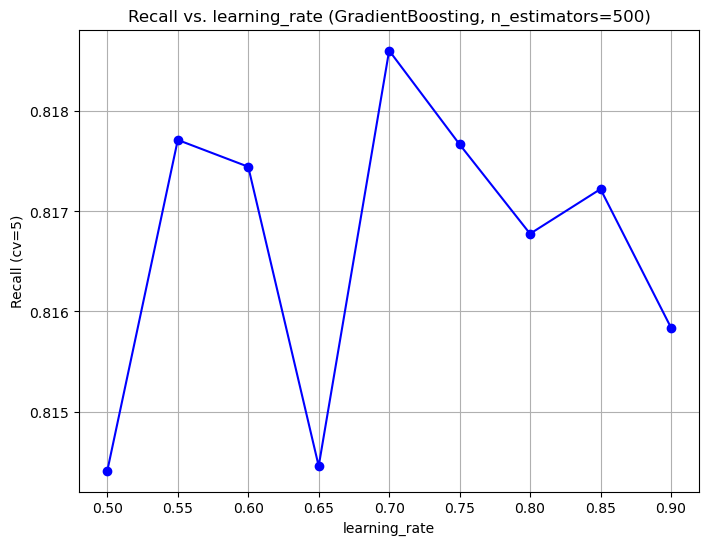

In [55]:
gb = GradientBoostingClassifier()

param_grid = {
    'n_estimators': [500],
    'learning_rate': [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9],
    'max_depth': [3],
    'min_samples_split': [2],
    'random_state': [42]
}

grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters :", grid_search.best_params_)

results = grid_search.cv_results_
learning_rates = np.array(results['param_learning_rate'].data, dtype=float)
n_estimators = np.array(results['param_n_estimators'].data, dtype=int)
recalls = results['mean_test_score']


plt.figure(figsize=(8, 6))
plt.plot(learning_rates, recalls, marker='o', linestyle='-', color='blue')
plt.xlabel('learning_rate')
plt.ylabel('Recall (cv=5)')
plt.title('Recall vs. learning_rate (GradientBoosting, n_estimators=500)')
plt.grid(True)
plt.show()



There seem to be two possible maximums: around 0.75 and around 0.55.
We conduct a more precise search between 0.65 and 0.75

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters : {'learning_rate': 0.7100000000000001, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 500, 'random_state': 42}


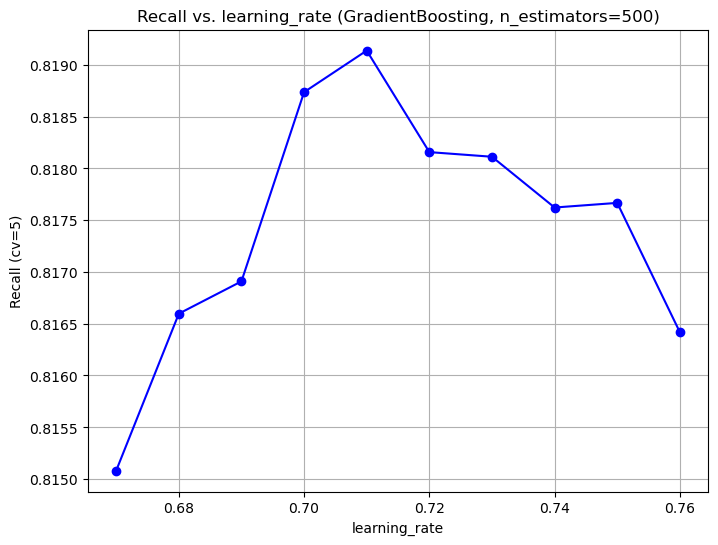

In [56]:
gb = GradientBoostingClassifier()

param_grid = {
    'n_estimators': [500],
    'learning_rate': [0.67+0.01*i for i in range(10)],
    'max_depth': [3],
    'min_samples_split': [2],
    'random_state': [42]
}

grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters :", grid_search.best_params_)

results = grid_search.cv_results_
learning_rates = np.array(results['param_learning_rate'].data, dtype=float)
n_estimators = np.array(results['param_n_estimators'].data, dtype=int)
recalls = results['mean_test_score']


plt.figure(figsize=(8, 6))
plt.plot(learning_rates, recalls, marker='o', linestyle='-', color='blue')
plt.xlabel('learning_rate')
plt.ylabel('Recall (cv=5)')
plt.title('Recall vs. learning_rate (GradientBoosting, n_estimators=500)')
plt.grid(True)
plt.show()

We find a best learning rate of 0.71 with a recall of 0.8191
We search around 0.55.

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters : {'learning_rate': 0.55, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 500, 'random_state': 42}


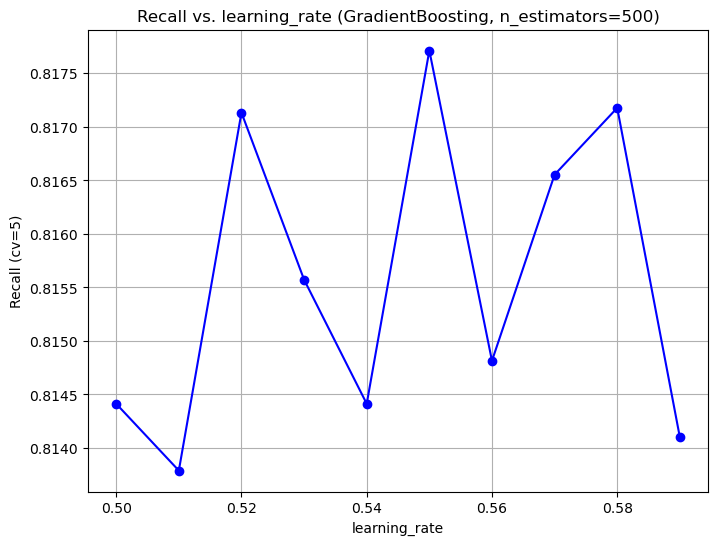

In [57]:
gb = GradientBoostingClassifier()

param_grid = {
    'n_estimators': [500],
    'learning_rate': [0.5+0.01*i for i in range(10)],
    'max_depth': [3],
    'min_samples_split': [2],
    'random_state': [42]
}

grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters :", grid_search.best_params_)

results = grid_search.cv_results_
learning_rates = np.array(results['param_learning_rate'].data, dtype=float)
n_estimators = np.array(results['param_n_estimators'].data, dtype=int)
recalls = results['mean_test_score']


plt.figure(figsize=(8, 6))
plt.plot(learning_rates, recalls, marker='o', linestyle='-', color='blue')
plt.xlabel('learning_rate')
plt.ylabel('Recall (cv=5)')
plt.title('Recall vs. learning_rate (GradientBoosting, n_estimators=500)')
plt.grid(True)
plt.show()

We find a maximum at 0.55 but it only has a recall of 0.8176 which doesnt surpass the previously found maximum.

We can now check if these results seem similar for other sizes of tree. To make the search faster we choose n_estimators=100.

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Hyperparameters: {'learning_rate': 0.74, 'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 500, 'random_state': 42}


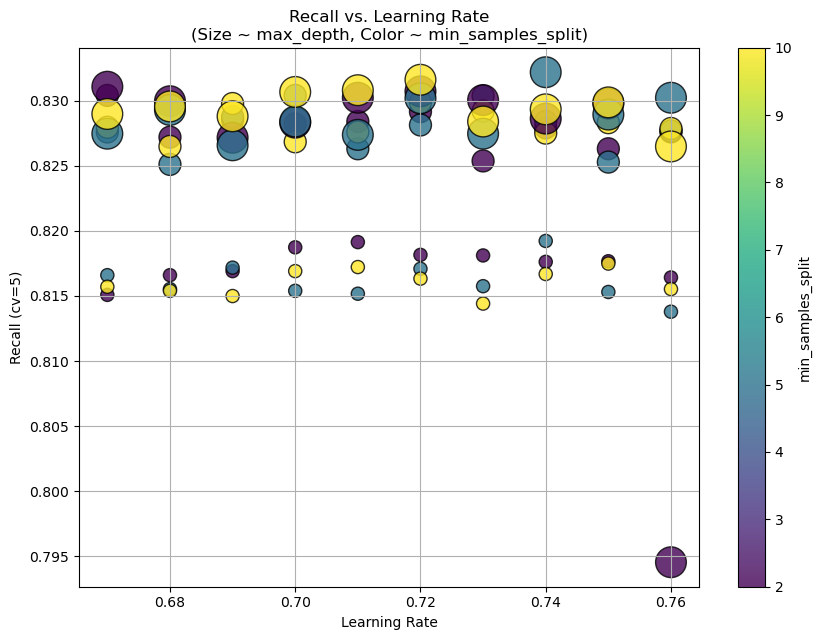

In [58]:
gb = GradientBoostingClassifier()

param_grid = {
    'n_estimators': [500],
    'learning_rate': [0.67+0.01*i for i in range(10)],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'random_state': [42]
}

grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

results = grid_search.cv_results_

learning_rates = np.array(results['param_learning_rate'].data, dtype=float)
max_depths = np.array(results['param_max_depth'].data, dtype=int)
min_samples_splits = np.array(results['param_min_samples_split'].data, dtype=int)
recalls = np.array(results['mean_test_score'])

sizes = (max_depths ** 2) * 10

plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    learning_rates,
    recalls,
    s=sizes,
    c=min_samples_splits,
    cmap='viridis',
    alpha=0.8,
    edgecolors='k'
)

plt.xlabel('Learning Rate')
plt.ylabel('Recall (cv=5)')
plt.title('Recall vs. Learning Rate\n(Size ~ max_depth, Color ~ min_samples_split)')
plt.grid(True)
cbar = plt.colorbar(scatter)
cbar.set_label('min_samples_split')

plt.show()

We observe that a a tree depth of 5 or 7 give similar results, we therefore choose 5.

Since the min_samples_split doesnt seem to have a general trend, we will use the greater values to simplify the model.

We choose a learning rate of 0.69 as it seems to give a better result with a high sample split and a depth of 5.

The last parameter to find is n_estimator.

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'learning_rate': 0.69, 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 700, 'random_state': 42}


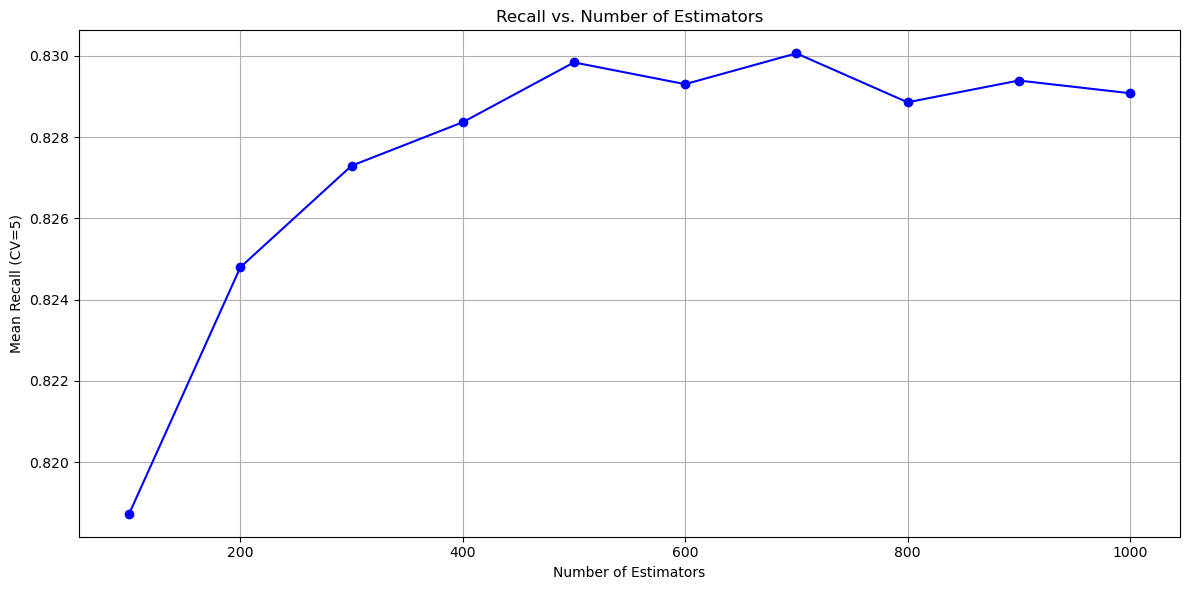

In [ ]:
gb = GradientBoostingClassifier()

param_grid = {
    'n_estimators': [100*i for i in range(1, 11)],
    'learning_rate': [0.69],
    'max_depth': [5],
    'min_samples_split': [10],
    'random_state': [42]
}

grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

results = grid_search.cv_results_

n_estimators = results['param_n_estimators'].data
recalls = results['mean_test_score']
plt.figure(figsize=(12, 6))
plt.plot(n_estimators, recalls, 'o-', color='blue')
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Recall (CV=5)")
plt.title("Recall vs. Number of Estimators")
plt.grid(True)
plt.tight_layout()
plt.show()

We observe that the curve starts to stabilise from n=500, we therefore choose this number as our parameter.

We keep a number of estimators of 90.

### Results

In [60]:
gb = GradientBoostingClassifier(learning_rate=0.69, n_estimators=500, min_samples_split=10, max_depth=5, random_state=42)

gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

recall = recall_score(y_test, y_pred)

print(f"Recall: {recall:.4f}")

Recall: 0.8357


## Multi-layer Perceptron

### Tunning Hyperparameters

Assuming that the data can't be linearly separable, we need at least two hidden layers.

We first try to find the best activation function by fixing the hidden layers to [50, 50] and other hyperparameters by default.

Here again, the computational cost is a problem. Accepting 15 minutes running, we found that the bigger subset is 50%.

In [61]:
subset_size = 0.5
X_subset, _, y_subset, _ = train_test_split(X_train, y_train, train_size=subset_size, stratify=y_train, random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)

param_grid = {
    'activation': ['relu', 'tanh', 'logistic']
}

grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best activation function:", grid_search.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best activation function: {'activation': 'relu'}


Best activation function: {'activation': 'relu'}

Now let's look for the best hidden layer size.

We first try to see what is the recall when using 2 symmetrical hidden layers containing between 20 and 200 neurons:

The computational cost is also a big problem here. We tried to sample our data to reduce it but even by reducing it up to 50%, the script was not finished after 1h. We reduced more the subset until reaching around 15min of running with 20%.

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best hidden layer sizes: {'hidden_layer_sizes': (20, 20)}
Best recall score: 0.8373042698150976


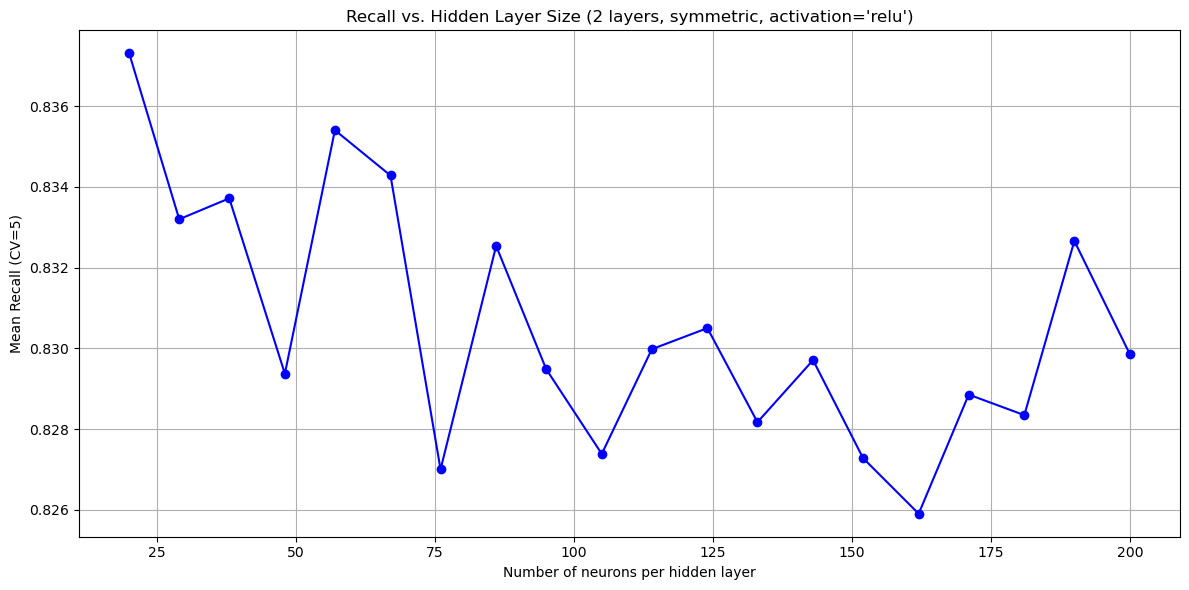

In [62]:
subset_size = 0.2
X_subset, _, y_subset, _ = train_test_split(X_train, y_train, train_size=subset_size, stratify=y_train, random_state=42)

sizes = np.linspace(20, 200, 20, dtype=int)
layer_sizes = [(size, size) for size in sizes]  

param_grid = {
    'hidden_layer_sizes': layer_sizes
}

mlp = MLPClassifier(max_iter=1000, activation='relu', random_state=42)

scorer = make_scorer(recall_score, average='macro')

grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_subset, y_subset)

print("Best hidden layer sizes:", grid_search.best_params_)
print("Best recall score:", grid_search.best_score_)

results = grid_search.cv_results_
recalls = results['mean_test_score']
neurons_per_layer = [tpl[0] for tpl in results['param_hidden_layer_sizes']]  
plt.figure(figsize=(12, 6))
plt.plot(neurons_per_layer, recalls, 'o-', color='blue')
plt.xlabel("Number of neurons per hidden layer")
plt.ylabel("Mean Recall (CV=5)")
plt.title("Recall vs. Hidden Layer Size (2 layers, symmetric, activation='relu')")
plt.grid(True)
plt.tight_layout()
plt.show()

These results suggest a relative small number of neurons. Let's take a closer look around [20,20]:

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best hidden layer sizes: {'hidden_layer_sizes': (20, 20)}
Best recall score: 0.8373042698150976


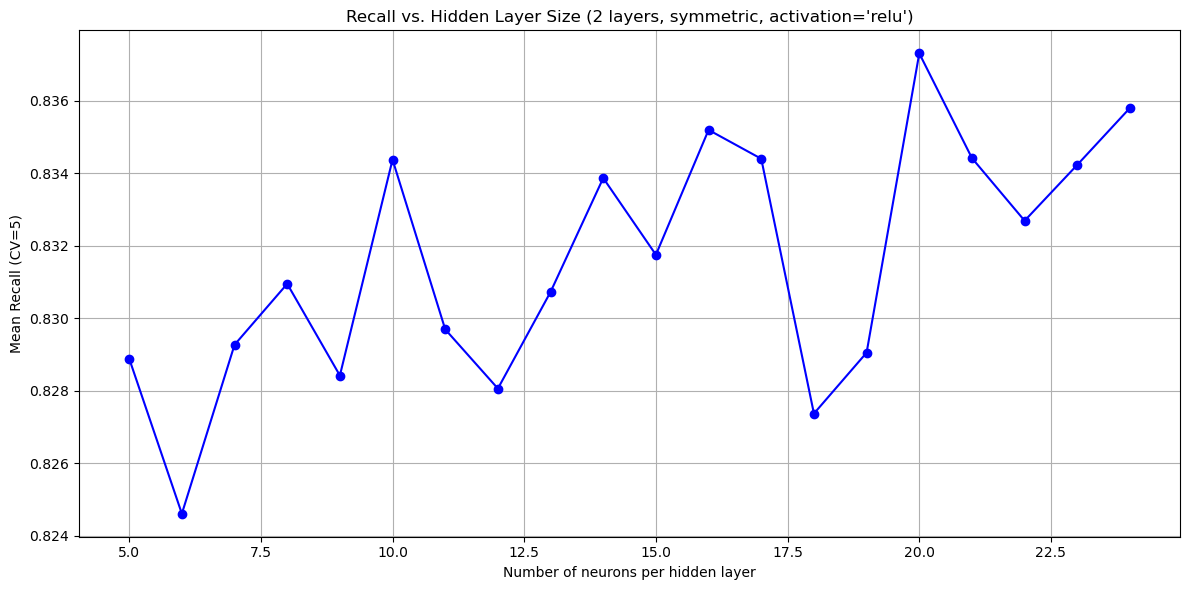

In [63]:
subset_size = 0.2
X_subset, _, y_subset, _ = train_test_split(X_train, y_train, train_size=subset_size, stratify=y_train, random_state=42)

sizes = np.linspace(5, 24, 20, dtype=int)
layer_sizes = [(size, size) for size in sizes]  

param_grid = {
    'hidden_layer_sizes': layer_sizes
}

mlp = MLPClassifier(max_iter=1000, activation='relu', random_state=42)

scorer = make_scorer(recall_score, average='macro')

grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_subset, y_subset)

print("Best hidden layer sizes:", grid_search.best_params_)
print("Best recall score:", grid_search.best_score_)

results = grid_search.cv_results_
recalls = results['mean_test_score']
neurons_per_layer = [tpl[0] for tpl in results['param_hidden_layer_sizes']]  
plt.figure(figsize=(12, 6))
plt.plot(neurons_per_layer, recalls, 'o-', color='blue')
plt.xlabel("Number of neurons per hidden layer")
plt.ylabel("Mean Recall (CV=5)")
plt.title("Recall vs. Hidden Layer Size (2 layers, symmetric, activation='relu')")
plt.grid(True)
plt.tight_layout()
plt.show()

We keep in mind the layer size [20,20] which sounds good because it seems to offer the best recall whil not proning overfitting.

Now let's test 3 hidden layers, we decrease the size of the Grid Search to decrease a little bit the computational cost.

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hidden layer sizes: {'hidden_layer_sizes': (28, 28)}
Best recall score: 0.8379660170086229


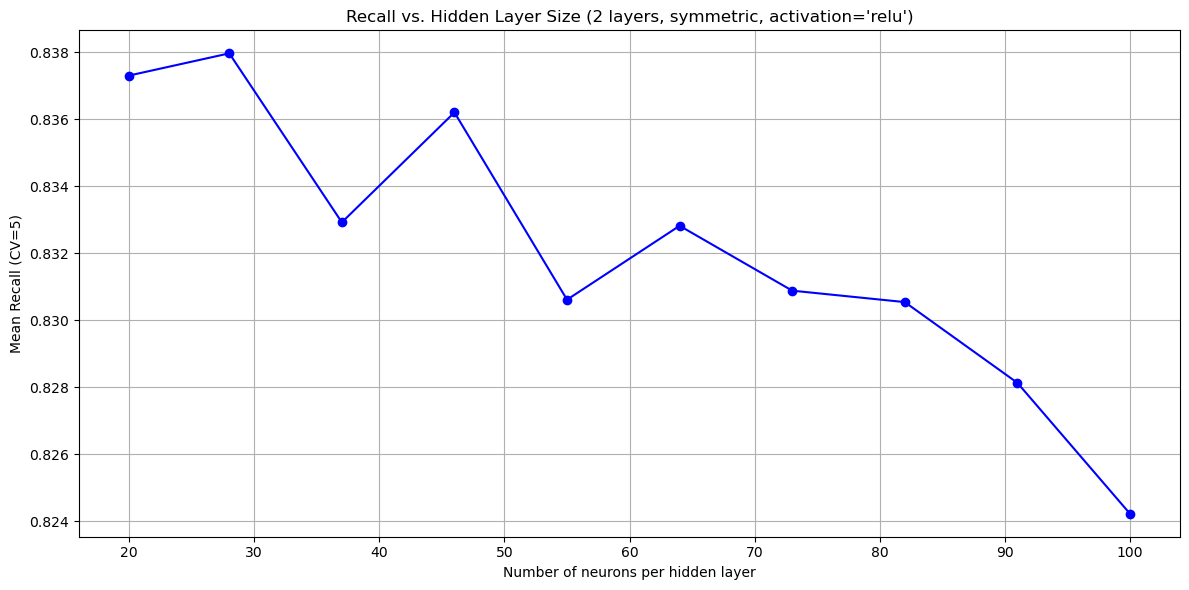

In [64]:
subset_size = 0.2
X_subset, _, y_subset, _ = train_test_split(X_train, y_train, train_size=subset_size, stratify=y_train, random_state=42)

sizes = np.linspace(20, 100, 10, dtype=int)
layer_sizes = [(size, size) for size in sizes]  

param_grid = {
    'hidden_layer_sizes': layer_sizes
}

mlp = MLPClassifier(max_iter=1000, activation='relu', random_state=42)

scorer = make_scorer(recall_score, average='macro')

grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_subset, y_subset)

print("Best hidden layer sizes:", grid_search.best_params_)
print("Best recall score:", grid_search.best_score_)

results = grid_search.cv_results_
recalls = results['mean_test_score']
neurons_per_layer = [tpl[0] for tpl in results['param_hidden_layer_sizes']]  
plt.figure(figsize=(12, 6))
plt.plot(neurons_per_layer, recalls, 'o-', color='blue')
plt.xlabel("Number of neurons per hidden layer")
plt.ylabel("Mean Recall (CV=5)")
plt.title("Recall vs. Hidden Layer Size (2 layers, symmetric, activation='relu')")
plt.grid(True)
plt.tight_layout()
plt.show()

The recall is almost the same and the difference between the best size here and [20, 20] is not relevant. We will keep [20, 20].

### Results

In [65]:
mlp = MLPClassifier(hidden_layer_sizes=(20, 20), activation='relu', max_iter=1000, random_state=42)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

recall = recall_score(y_test, y_pred) 

print("Recall:", recall)

Recall: 0.7992928452579035


Recall: 0.7992928452579035

### Trying to improve

The bad recall suggest that, maybe due to the subset that we've made when tunning hyperparameters, the model is not the more efficient. We will here take the second best recall that we had, with more neurons (here [50, 50]), in order to reduce the biais of this model.

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hidden layer sizes: {'hidden_layer_sizes': (46, 46)}
Best recall score: 0.8362028608027575


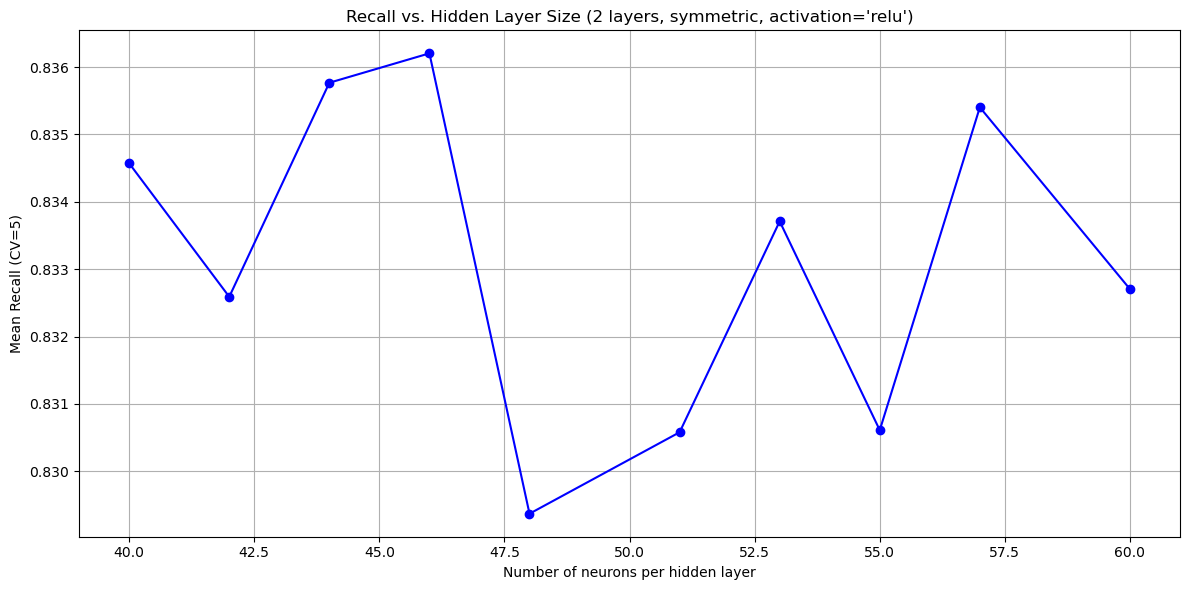

In [66]:
subset_size = 0.2
X_subset, _, y_subset, _ = train_test_split(X_train, y_train, train_size=subset_size, stratify=y_train, random_state=42)

sizes = np.linspace(40, 60, 10, dtype=int)
layer_sizes = [(size, size) for size in sizes]  

param_grid = {
    'hidden_layer_sizes': layer_sizes
}

mlp = MLPClassifier(max_iter=1000, activation='relu', random_state=42)

scorer = make_scorer(recall_score, average='macro')

grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_subset, y_subset)

print("Best hidden layer sizes:", grid_search.best_params_)
print("Best recall score:", grid_search.best_score_)

results = grid_search.cv_results_
recalls = results['mean_test_score']
neurons_per_layer = [tpl[0] for tpl in results['param_hidden_layer_sizes']]  
plt.figure(figsize=(12, 6))
plt.plot(neurons_per_layer, recalls, 'o-', color='blue')
plt.xlabel("Number of neurons per hidden layer")
plt.ylabel("Mean Recall (CV=5)")
plt.title("Recall vs. Hidden Layer Size (2 layers, symmetric, activation='relu')")
plt.grid(True)
plt.tight_layout()
plt.show()

Now we try [46,46]:

In [67]:
mlp = MLPClassifier(hidden_layer_sizes=(46, 46), activation='relu', max_iter=1000, random_state=42)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

recall = recall_score(y_test, y_pred) 

print("Recall:", recall)

Recall: 0.8209234608985025


Recall: 0.8209234608985025

# **CONCLUSIONS**

Here is the summary of all our algorithm's recall: 

Gaussian Naive Bayes – 0.8579

Random Forest – 0.8429

Adaptive Boosting – 0.8388

K-Nearest Neighbors – 0.8270

Multi-layer perceptron - 0.8209

Bagging – 0.8093

Decision Tree – 0.7993

Support Vector Machines – 0.7935

Logistic Regression – 0.6976

We can notice that the Gaussian prediction is very good. That might come from our data preparation we made before, when trying to understand which features were correlated with confusion matrix for categorical and numerical data:

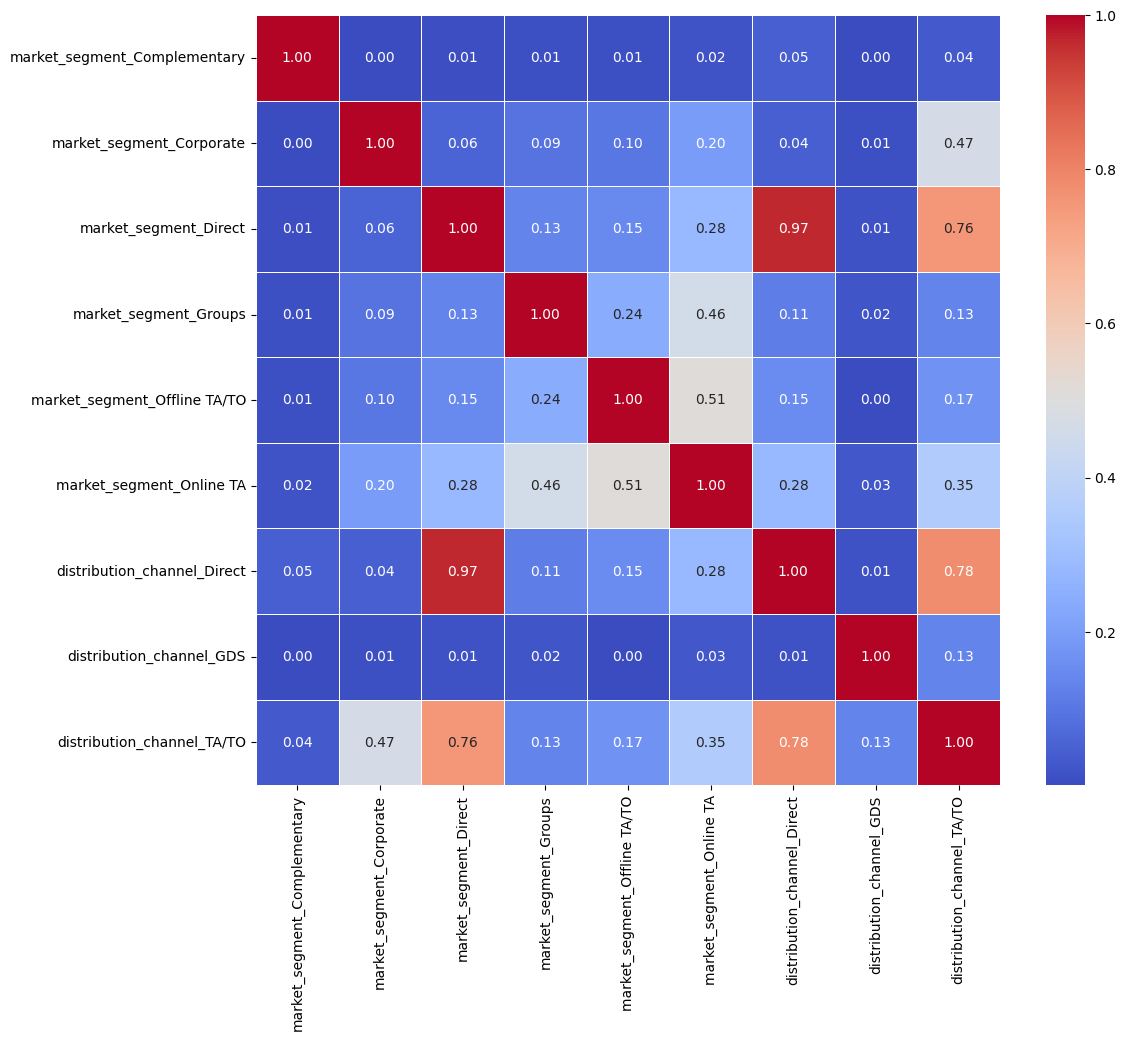

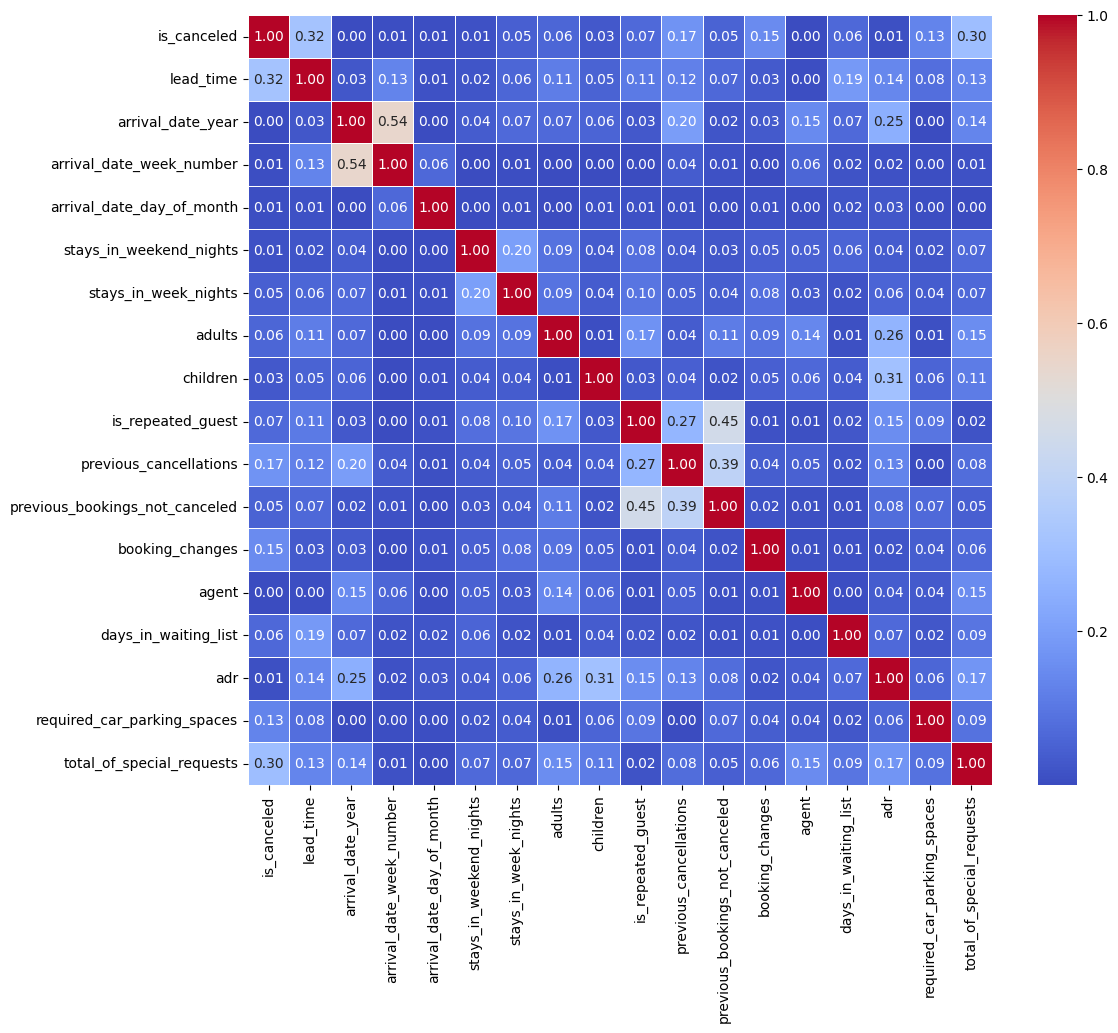

Moreover, the fact that Adaptive Boosting was using a sample size of 1, and that the Random Forest performed well, indicates good stability.

However, this stability might sometimes be excessive, as suggested by the poor predictions of the Decision Tree and Logistic Regression, both of which are high-bias algorithms.

The same argument can be made for the poor performance of the Support Vector Machine, which also has high bias. However, it's important to note that we lacked expert knowledge when choosing the appropriate kernel function, and we tuned it independently of the regularization parameter C.

Finally, we keep in mind that our recalls obtained may not be the best, especially when using subsets to reduce the computational time in k-NN and MLP.

Our work shows that the best model tested here is the Gaussian Naive Bayes algorithm.